In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pycaret.classification import *

In [2]:
data = pd.read_csv("churn.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Check for Missing Values: Even if the summary shows no nulls, it's good to double-check.

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Check for Duplicates:

In [8]:
data.duplicated().sum()

0

### Descriptive Analysis:

In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
data['Geography'].describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [11]:
data['Gender'].describe()

count     10000
unique        2
top        Male
freq       5457
Name: Gender, dtype: object

In [12]:
# Check for unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
print(data[['Geography', 'Gender']].nunique())


Unique Values in Categorical Columns:
Geography    3
Gender       2
dtype: int64


In [13]:
# Distribution of categorical variables
print("\nDistribution of 'Geography':")
print(data['Geography'].value_counts())


Distribution of 'Geography':
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


In [14]:
print("\nDistribution of 'Gender':")
print(data['Gender'].value_counts())


Distribution of 'Gender':
Male      5457
Female    4543
Name: Gender, dtype: int64


In [15]:
# Check the distribution of the target variable
print("\nDistribution of 'Exited' (target variable):")
print(data['Exited'].value_counts())



Distribution of 'Exited' (target variable):
0    7963
1    2037
Name: Exited, dtype: int64


In [16]:
# Correlation matrix
print("\nCorrelation matrix:")
print(data.corr())


Correlation matrix:
                 RowNumber  CustomerId  CreditScore       Age    Tenure  \
RowNumber         1.000000    0.004202     0.005840  0.000783 -0.006495   
CustomerId        0.004202    1.000000     0.005308  0.009497 -0.014883   
CreditScore       0.005840    0.005308     1.000000 -0.003965  0.000842   
Age               0.000783    0.009497    -0.003965  1.000000 -0.009997   
Tenure           -0.006495   -0.014883     0.000842 -0.009997  1.000000   
Balance          -0.009067   -0.012419     0.006268  0.028308 -0.012254   
NumOfProducts     0.007246    0.016972     0.012238 -0.030680  0.013444   
HasCrCard         0.000599   -0.014025    -0.005458 -0.011721  0.022583   
IsActiveMember    0.012044    0.001665     0.025651  0.085472 -0.028362   
EstimatedSalary  -0.005988    0.015271    -0.001384 -0.007201  0.007784   
Exited           -0.016571   -0.006248    -0.027094  0.285323 -0.014001   

                  Balance  NumOfProducts  HasCrCard  IsActiveMember  \
RowNumb

C:\Users\nabee\AppData\Local\Temp\ipykernel_22192\1565841300.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(data.corr())


# Data Preprocessing
## Data Transformation

- One-Hot Encoding is used for Geography to handle multiple non-ordinal categories correctly.


- Label Encoding is used for Gender because it's a binary categorical variable, and a simple numeric conversion is both efficient and sufficient.

In [18]:
# One-hot encoding for 'Geography'
data = pd.get_dummies(data, columns=['Geography'])

In [19]:
# Printing distribution of 'Geography' before encoding
print("\nDistribution of 'Geography':")
print(data[['Geography_France', 'Geography_Spain', 'Geography_Germany']].sum())


Distribution of 'Geography':
Geography_France     5014
Geography_Spain      2477
Geography_Germany    2509
dtype: int64


In [20]:
# Label encoding for 'Gender'
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
print(label_encoder.classes_)
# 0  represents Female.
# 1  represents Male.

['Female' 'Male']


In [21]:
print("\nData after encoding:")
data


Data after encoding:


,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,1,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,0,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,Sabbatini,772,1,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Gender             10000 non-null  int32  
 5   Age                10000 non-null  int64  
 6   Tenure             10000 non-null  int64  
 7   Balance            10000 non-null  float64
 8   NumOfProducts      10000 non-null  int64  
 9   HasCrCard          10000 non-null  int64  
 10  IsActiveMember     10000 non-null  int64  
 11  EstimatedSalary    10000 non-null  float64
 12  Exited             10000 non-null  int64  
 13  Geography_France   10000 non-null  uint8  
 14  Geography_Germany  10000 non-null  uint8  
 15  Geography_Spain    10000 non-null  uint8  
dtypes: float64(2), int32(1)

# Exploratory Data Analysis¶


# Univariate Analysis



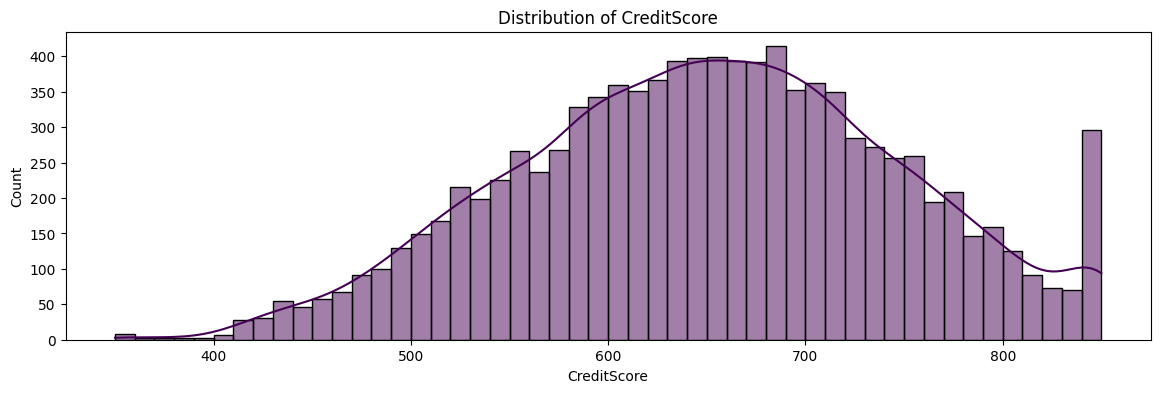

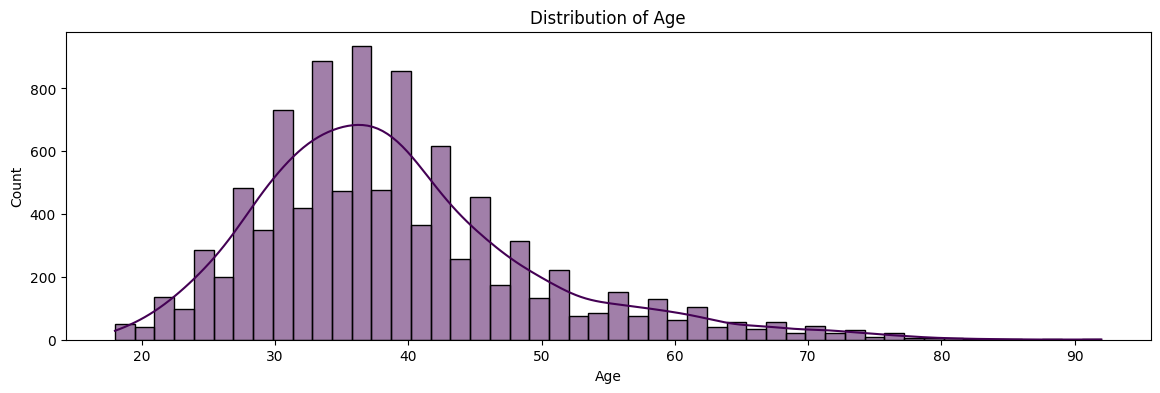

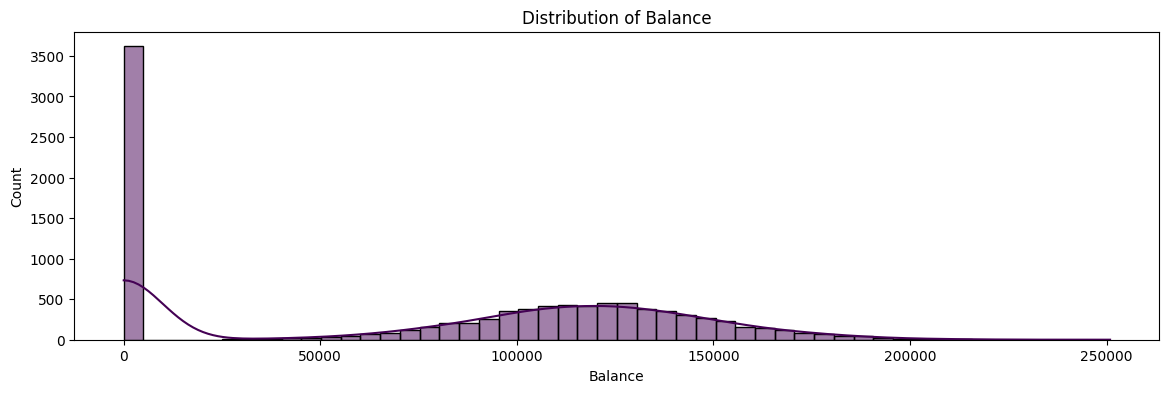

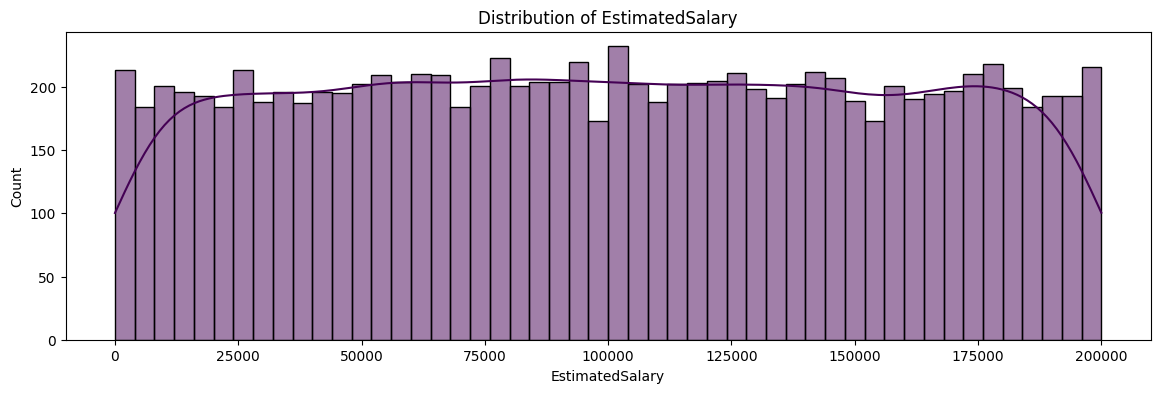

In [117]:
# List of numeric columns
numeric_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Loop through each numeric column to plot histograms
for col in numeric_cols:
    plt.figure(figsize=(14, 4))
    
    # Apply the 'viridis' colormap for histograms
    sns.histplot(data[col], kde=True, bins=50, color=plt.cm.viridis(np.linspace(0, 1, 1))[0])  # Use viridis colormap
    
    plt.title(f"Distribution of {col}")
    plt.show()

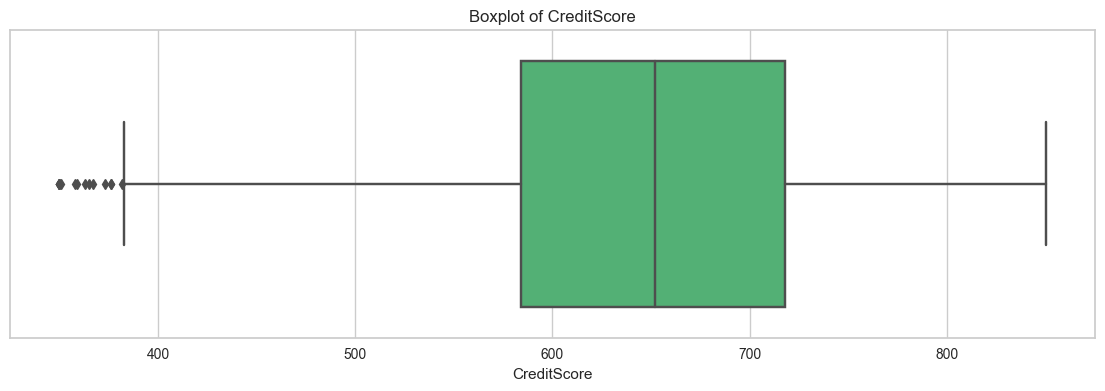

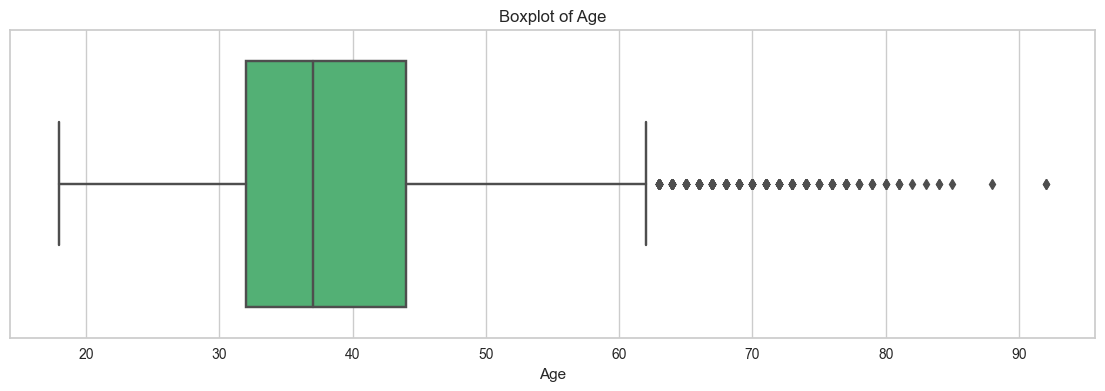

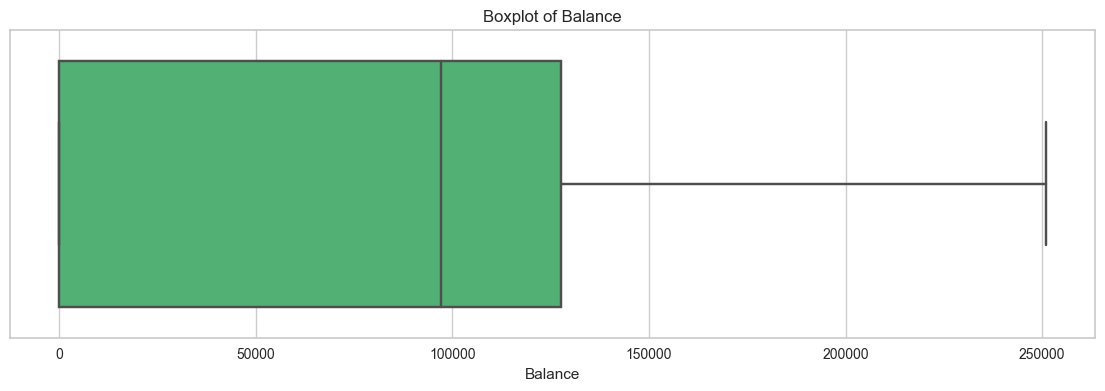

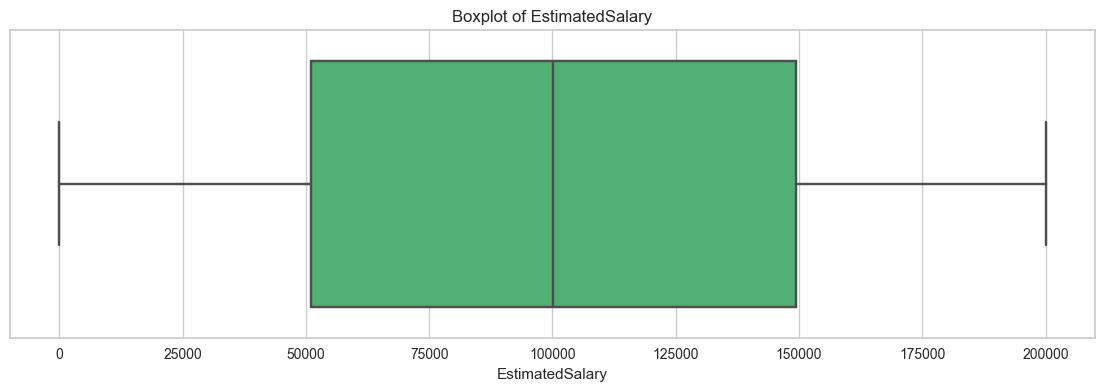

In [140]:
# List of numeric columns
numeric_cols = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

# Plot boxplots separately with the 'viridis' colormap
for col in numeric_cols:
    plt.figure(figsize=(14, 4))
    
    # Apply the 'viridis' colormap for boxplots
    sns.boxplot(x=data[col], color=plt.cm.viridis(0.7))  # Using one color from 'viridis'
    
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

### Insights on CreditScore  
The majority of credit scores fall above 500, with a few outliers below this threshold. The histogram shows a near-normal distribution, with the highest frequency around 650, which is close to the dataset's average credit score.

### Insights on Age  
The box plot highlights that the ages are mostly centered around the median, with a few outliers above 60. The histogram shows a right-skewed distribution, peaking at approximately age 40, which is near the dataset's mean age.

### Insights on Balance  
The box plot suggests that most of the balances are clustered around zero, with no significant outliers. The histogram displays a large proportion of zero balances, followed by a roughly normal distribution for non-zero balances, peaking near the mean balance of about 100,000.

### Insights on Estimated Salary  
The box plot indicates a relatively even distribution of estimated salaries, with no extreme outliers. The histogram suggests that salaries are evenly spread throughout the range, showing a uniform distribution across the dataset.

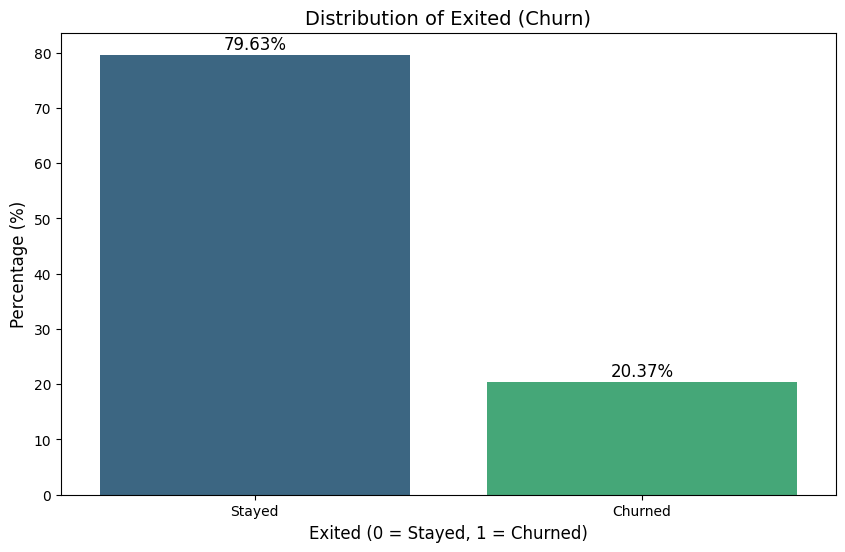

In [54]:
# Calculate the percentage of each category
percentages = data['Exited'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=percentages.index, y=percentages.values, palette='viridis')

# Add labels to the bars
for i, value in enumerate(percentages.values):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12)

# Add titles and labels
plt.title("Distribution of Exited (Churn)", fontsize=14)
plt.xlabel("Exited (0 = Stayed, 1 = Churned)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks([0, 1], labels=["Stayed", "Churned"])
plt.show()

### Insights on Exited  
The bar plot reveals that 79.6% of customers did not exit (label 0), while 20.4% of customers exited (label 1). This suggests a class imbalance, with a significantly larger proportion of customers remaining compared to those who left.

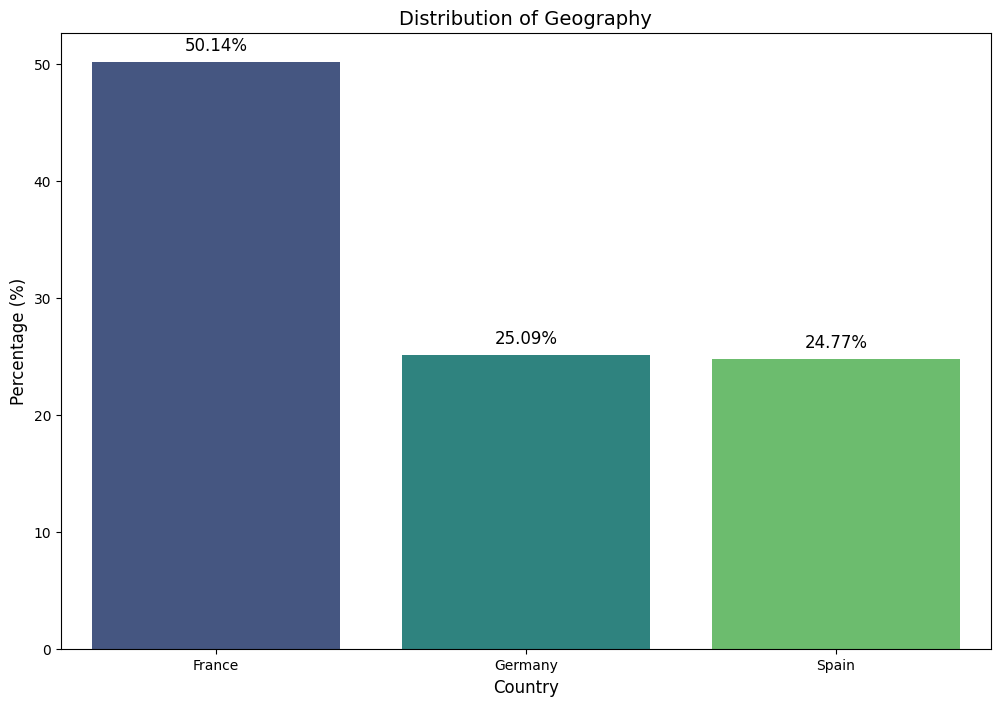

In [58]:
# Combine one-hot encoded geography columns into a single column for easier plotting
geography_counts = data[['Geography_France', 'Geography_Germany', 'Geography_Spain']].sum()
geography_percentages = (geography_counts / len(data)) * 100

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=geography_percentages.index, y=geography_percentages.values, palette='viridis')

# Add labels to the bars
for i, value in enumerate(geography_percentages.values):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12)

# Add titles and labels
plt.title("Distribution of Geography", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks([0, 1, 2], labels=["France", "Germany", "Spain"])
plt.show()

### Insights on Geography  
The bar plot illustrates that 50.1% of customers are from France, 25.1% from Germany, and 24.8% from Spain. This distribution suggests that the dataset is predominantly composed of French customers.

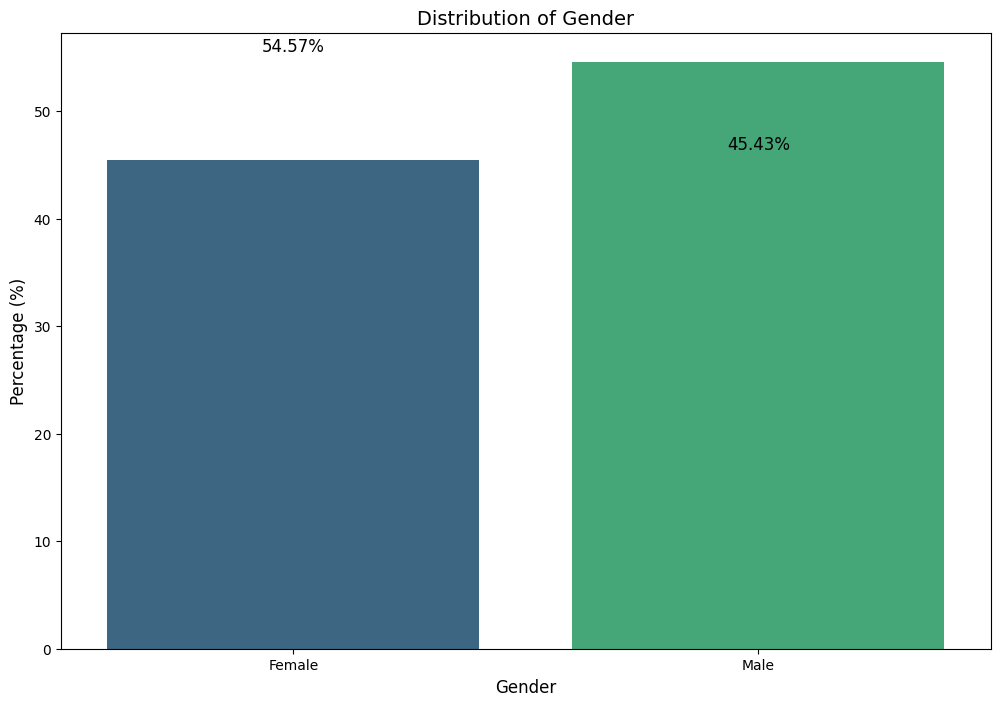

In [61]:
# Calculate the counts and percentages for Gender
gender_counts = data['Gender'].value_counts()
gender_percentages = (gender_counts / len(data)) * 100

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=gender_counts.index, y=gender_percentages.values, palette='viridis')

# Add labels to the bars
for i, value in enumerate(gender_percentages.values):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', fontsize=12)

# Add titles and labels
plt.title("Distribution of Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks([0, 1], labels=["Female", "Male"])  # Assuming 0=Female and 1=Male
plt.show()


### Insights on Gender  
The bar plot reveals that 54.6% of customers are male, while 45.4% are female, indicating a marginally higher proportion of male customers in the dataset.

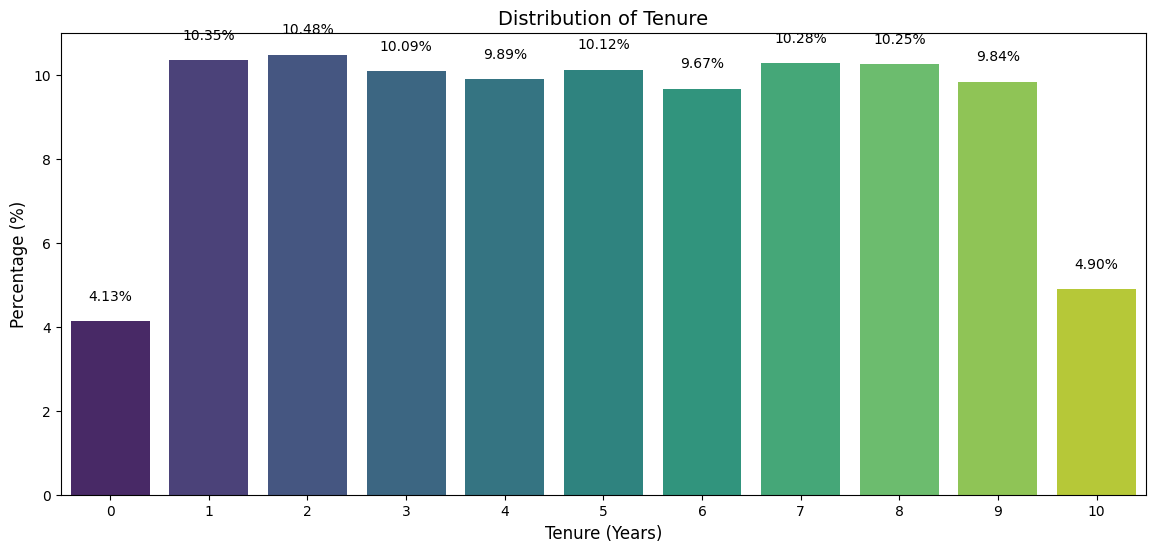

In [67]:
# Calculate the counts and percentages for Tenure
tenure_counts = data['Tenure'].value_counts().sort_index()  # Sort index for better visualization
tenure_percentages = (tenure_counts / len(data)) * 100

# Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(x=tenure_counts.index, y=tenure_percentages.values, palette='viridis')

# Add labels to the bars
for i, value in enumerate(tenure_percentages.values):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

# Add titles and labels
plt.title("Distribution of Tenure", fontsize=14)
plt.xlabel("Tenure (Years)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.show()


### Insights on Tenure  
The bar plot indicates that tenure is fairly evenly distributed across the years, with each tenure level representing around 10% of the customers. However, tenures of 0 and 10 years are less frequent, with only 4.1% and 4.9% of customers at these extremes, suggesting a lower number of customers with very short or long tenures.

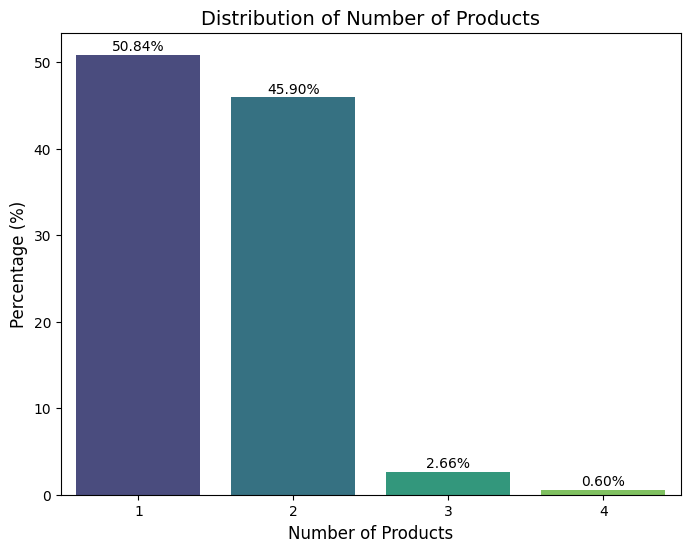

In [69]:
# Calculate the counts and percentages for NumOfProducts
products_counts = data['NumOfProducts'].value_counts().sort_index()
products_percentages = (products_counts / len(data)) * 100

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=products_counts.index, y=products_percentages.values, palette='viridis')

# Add labels to the bars
for i, value in enumerate(products_percentages.values):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

# Add titles and labels
plt.title("Distribution of Number of Products", fontsize=14)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.show()


### Insights on Number of Products  
The bar plot reveals that 50.8% of customers have one product, while 45.9% have two products. Only a small proportion of customers have three (2.7%) or four products (0.6%), suggesting that most customers tend to stick with one or two products.

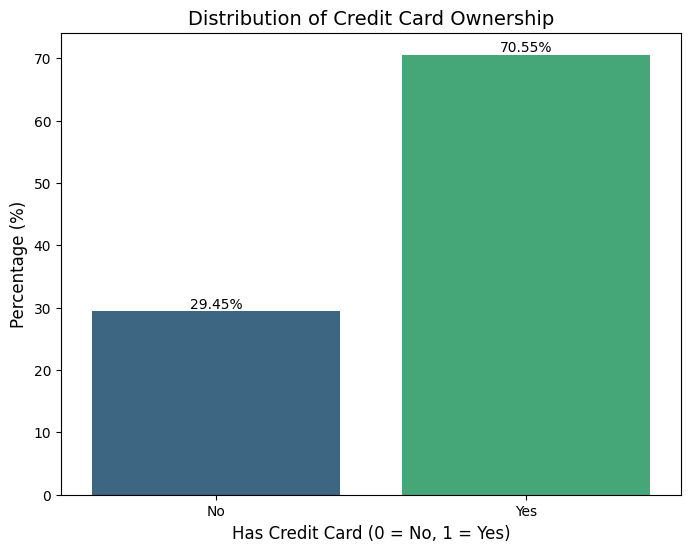

In [70]:
# Calculate the counts and percentages for HasCrCard
cr_card_counts = data['HasCrCard'].value_counts().sort_index()
cr_card_percentages = (cr_card_counts / len(data)) * 100

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=cr_card_counts.index, y=cr_card_percentages.values, palette='viridis')

# Add labels to the bars
for i, value in enumerate(cr_card_percentages.values):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

# Add titles and labels
plt.title("Distribution of Credit Card Ownership", fontsize=14)
plt.xlabel("Has Credit Card (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=10)
plt.show()


### Observations on Having a Credit Card  
The bar plot illustrates that 70.5% of customers possess a credit card, while 29.4% do not. This shows that the majority of customers have a credit card.

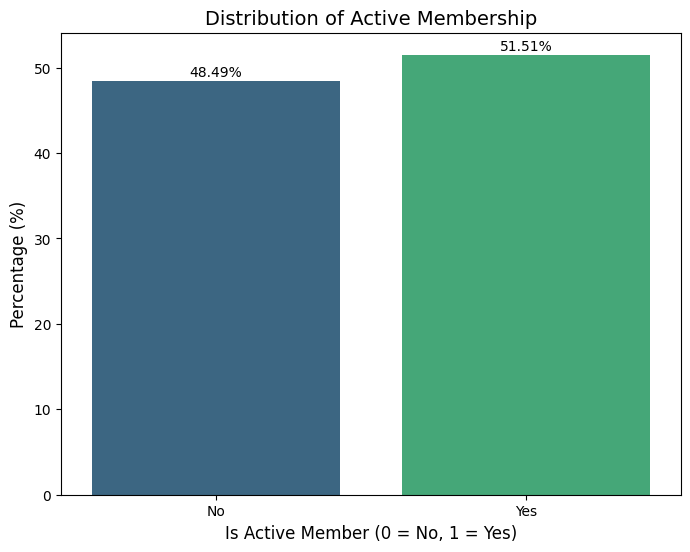

In [72]:
# Calculate the counts and percentages for IsActiveMember
active_member_counts = data['IsActiveMember'].value_counts().sort_index()
active_member_percentages = (active_member_counts / len(data)) * 100

# Plot the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=active_member_counts.index, y=active_member_percentages.values,  palette='viridis')

# Add labels to the bars
for i, value in enumerate(active_member_percentages.values):
    plt.text(i, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

# Add titles and labels
plt.title("Distribution of Active Membership", fontsize=14)
plt.xlabel("Is Active Member (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xticks([0, 1], ['No', 'Yes'], fontsize=10)
plt.show()


### Observations on Active Membership  
The bar plot reveals that 51.5% of customers are active members, while 48.5% are not. This indicates a nearly equal distribution between active and inactive members in the dataset.

# Bivariate Analysis

### Correlation plot

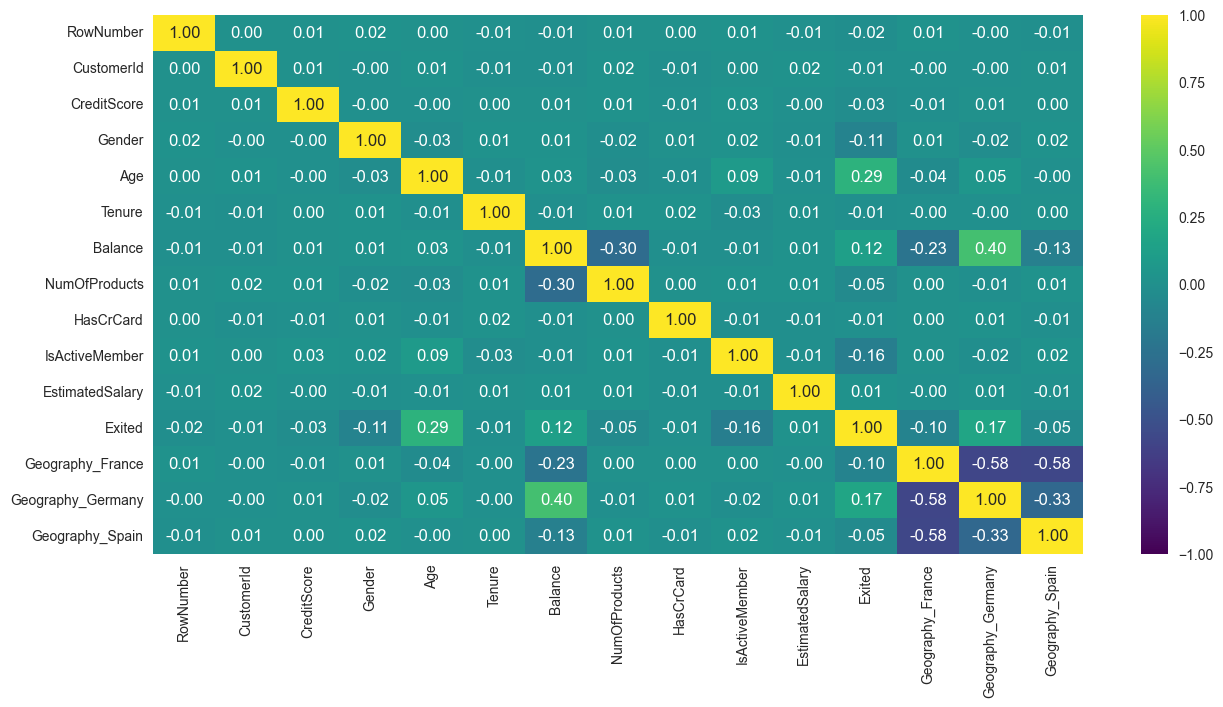

In [135]:
# Plot the heatmap with viridis colormap
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap='viridis')
plt.show()

The heatmap illustrates that the  features have very weak correlations, with most values close to zero. This indicates that there are minimal linear relationships between these variables, suggesting that the features are largely independent of one another in this dataset.

## Exited Vs Geography

<Figure size 1000x600 with 0 Axes>

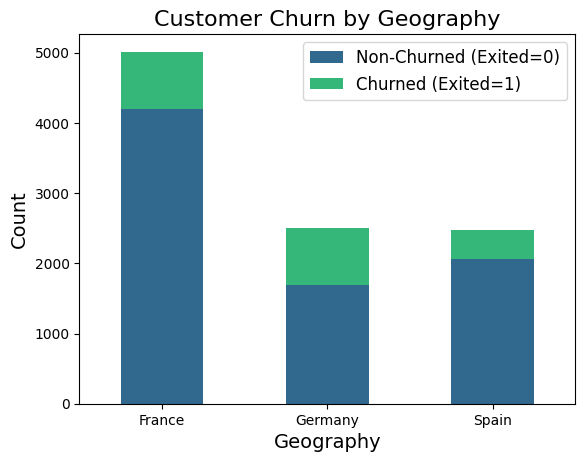

Summary Table:
Exited        0    1    Churn %  Non-Churn %
Geography                                   
France     4204  810  16.154767    83.845233
Germany    1695  814  32.443204    67.556796
Spain      2064  413  16.673395    83.326605


In [105]:
# Combine one-hot encoded geography columns into a single categorical column
data['Geography'] = data[['Geography_France', 'Geography_Germany', 'Geography_Spain']].idxmax(axis=1)
data['Geography'] = data['Geography'].str.replace('Geography_', '')

# Group the data by Geography and Exited, then calculate the counts
geo_exited_counts = data.groupby(["Geography", "Exited"]).size().unstack()

# Calculate percentages for each region
geo_exited_percent = geo_exited_counts.div(geo_exited_counts.sum(axis=1), axis=0) * 100

# Get a list of colors from the 'viridis' palette
colors = sns.color_palette("viridis", n_colors=2)

# Plot grouped bar chart with 'viridis' color palette
plt.figure(figsize=(10, 6))
geo_exited_counts.plot(kind="bar", stacked=True, color=colors)

# Add titles and labels
plt.title("Customer Churn by Geography", fontsize=16)
plt.xlabel("Geography", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(["Non-Churned (Exited=0)", "Churned (Exited=1)"], fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Display the summary table
summary_table = geo_exited_counts.copy()
summary_table["Churn %"] = geo_exited_percent[1]
summary_table["Non-Churn %"] = geo_exited_percent[0]

print("Summary Table:")
print(summary_table)

The stacked bar plot reveals that Germany has the highest proportion of exited customers, followed by Spain and France. While France has the largest customer base, a greater percentage of German customers have exited compared to those from Spain and France.

## Exited Vs Gender

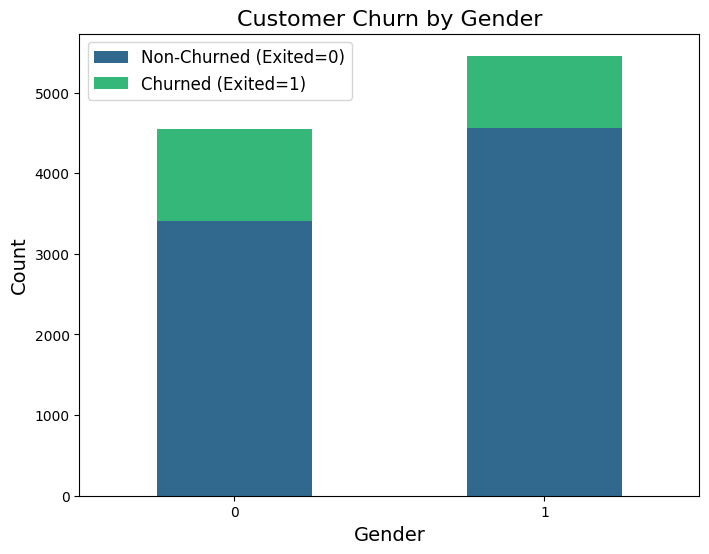

Summary Table for Gender:
Exited     0     1    Churn %  Non-Churn %
Gender                                    
0       3404  1139  25.071539    74.928461
1       4559   898  16.455928    83.544072


In [106]:
# Group the data by Gender and Exited, then calculate the counts
gender_exited_counts = data.groupby(["Gender", "Exited"]).size().unstack()

# Calculate percentages for each gender
gender_exited_percent = gender_exited_counts.div(gender_exited_counts.sum(axis=1), axis=0) * 100

# Plot grouped bar chart
gender_exited_counts.plot(kind="bar", figsize=(8, 6), stacked=True, color=colors)
plt.title("Customer Churn by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(["Non-Churned (Exited=0)", "Churned (Exited=1)"], fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Display the summary table
summary_table_gender = gender_exited_counts.copy()
summary_table_gender["Churn %"] = gender_exited_percent[1]
summary_table_gender["Non-Churn %"] = gender_exited_percent[0]

print("Summary Table for Gender:")
print(summary_table_gender)

The stacked bar plot indicates that a higher proportion of female customers have exited compared to male customers. While the dataset has more male customers overall, the exit rate is slightly higher among female customers.

# Exited Vs Has Credit Card

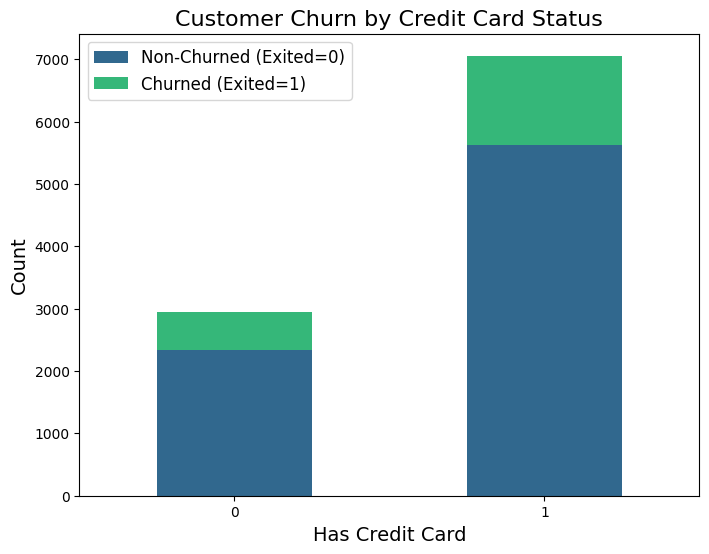

Summary Table for Credit Card and Churn:
Exited        0     1    Churn %  Non-Churn %
HasCrCard                                    
0          2332   613  20.814941    79.185059
1          5631  1424  20.184266    79.815734


In [108]:
# Group the data by HasCrCard and Exited, then calculate the counts
crcard_exited_counts = data.groupby(["HasCrCard", "Exited"]).size().unstack()

# Calculate percentages for each credit card status
crcard_exited_percent = crcard_exited_counts.div(crcard_exited_counts.sum(axis=1), axis=0) * 100

# Plot grouped bar chart
crcard_exited_counts.plot(kind="bar", figsize=(8, 6), stacked=True, color=colors)
plt.title("Customer Churn by Credit Card Status", fontsize=16)
plt.xlabel("Has Credit Card", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(["Non-Churned (Exited=0)", "Churned (Exited=1)"], fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Display the summary table
summary_table_crcard = crcard_exited_counts.copy()
summary_table_crcard["Churn %"] = crcard_exited_percent[1]
summary_table_crcard["Non-Churn %"] = crcard_exited_percent[0]

print("Summary Table for Credit Card and Churn:")
print(summary_table_crcard)

The stacked bar plot shows that the exit rate is slightly higher for customers without a credit card compared to those with a credit card. However, the difference is minimal, indicating that having a credit card has a limited impact on customer exit behavior in this dataset.

# Exited Vs Is active member

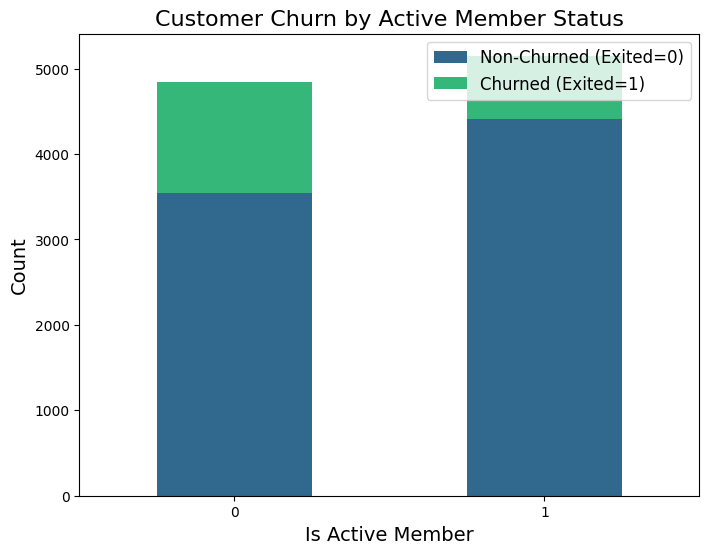

Summary Table for Active Member and Churn:
Exited             0     1    Churn %  Non-Churn %
IsActiveMember                                    
0               3547  1302  26.850897    73.149103
1               4416   735  14.269074    85.730926


In [109]:
# Group the data by IsActiveMember and Exited, then calculate the counts
active_member_exited_counts = data.groupby(["IsActiveMember", "Exited"]).size().unstack()

# Calculate percentages for each active member status
active_member_exited_percent = active_member_exited_counts.div(active_member_exited_counts.sum(axis=1), axis=0) * 100

# Plot grouped bar chart
active_member_exited_counts.plot(kind="bar", figsize=(8, 6), stacked=True, color=colors)
plt.title("Customer Churn by Active Member Status", fontsize=16)
plt.xlabel("Is Active Member", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(["Non-Churned (Exited=0)", "Churned (Exited=1)"], fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Display the summary table
summary_table_active_member = active_member_exited_counts.copy()
summary_table_active_member["Churn %"] = active_member_exited_percent[1]
summary_table_active_member["Non-Churn %"] = active_member_exited_percent[0]

print("Summary Table for Active Member and Churn:")
print(summary_table_active_member)


The stacked bar plot reveals that the exit rate is slightly higher for customers without a credit card compared to those who have one. However, the difference is minimal, suggesting that having a credit card has a limited effect on customer exit behavior in this dataset.

# Exited Vs Credit Score

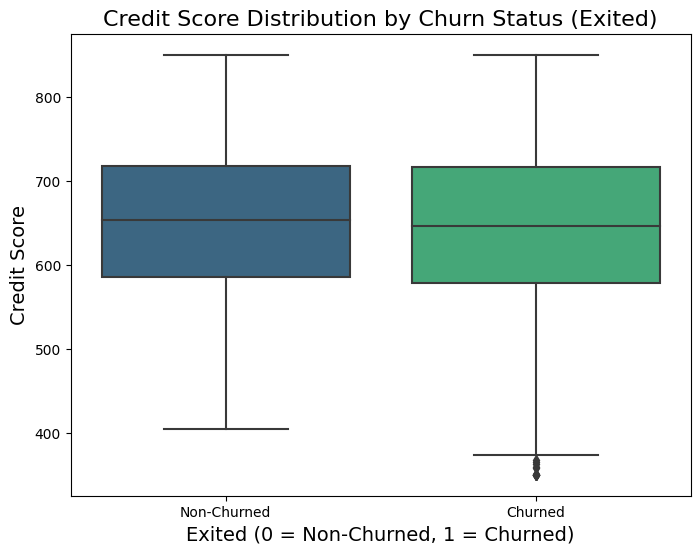

Credit Score Summary by Churn Status (Exited):
         count        mean         std    min    25%    50%    75%    max
Exited                                                                   
0       7963.0  651.853196   95.653837  405.0  585.0  653.0  718.0  850.0
1       2037.0  645.351497  100.321503  350.0  578.0  646.0  716.0  850.0


In [110]:
# Create a boxplot for Exited vs CreditScore
plt.figure(figsize=(8, 6))
sns.boxplot(x="Exited", y="CreditScore", data=data, palette="viridis")
plt.title("Credit Score Distribution by Churn Status (Exited)", fontsize=16)
plt.xlabel("Exited (0 = Non-Churned, 1 = Churned)", fontsize=14)
plt.ylabel("Credit Score", fontsize=14)
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.show()

# Calculate summary statistics for CreditScore based on Exited
credit_score_summary = data.groupby("Exited")["CreditScore"].describe()

print("Credit Score Summary by Churn Status (Exited):")
print(credit_score_summary)

In [87]:
# Create a crosstab table for CreditScore vs Exited
credit_score_table = pd.crosstab(data['CreditScore'], data['Exited'], margins=True)

# Rename the columns for clarity
credit_score_table.columns = ['Exited = 0', 'Exited = 1', 'All']

# Print the table
print("Credit Score Table by Exited Status:")
print(credit_score_table)


Credit Score Table by Exited Status:
             Exited = 0  Exited = 1    All
CreditScore                               
350                   0           5      5
351                   0           1      1
358                   0           1      1
359                   0           1      1
363                   0           1      1
...                 ...         ...    ...
847                   4           2      6
848                   5           0      5
849                   6           2      8
850                 190          43    233
All                7963        2037  10000

[461 rows x 3 columns]


The table illustrates the distribution of customer exits based on different credit scores. While higher credit scores (e.g., 850) have a larger number of customers, there are still some exits within these groups. There doesn't seem to be a clear trend linking credit score to exit rate, implying that credit score alone may not serve as a strong predictor of customer exit in this dataset.

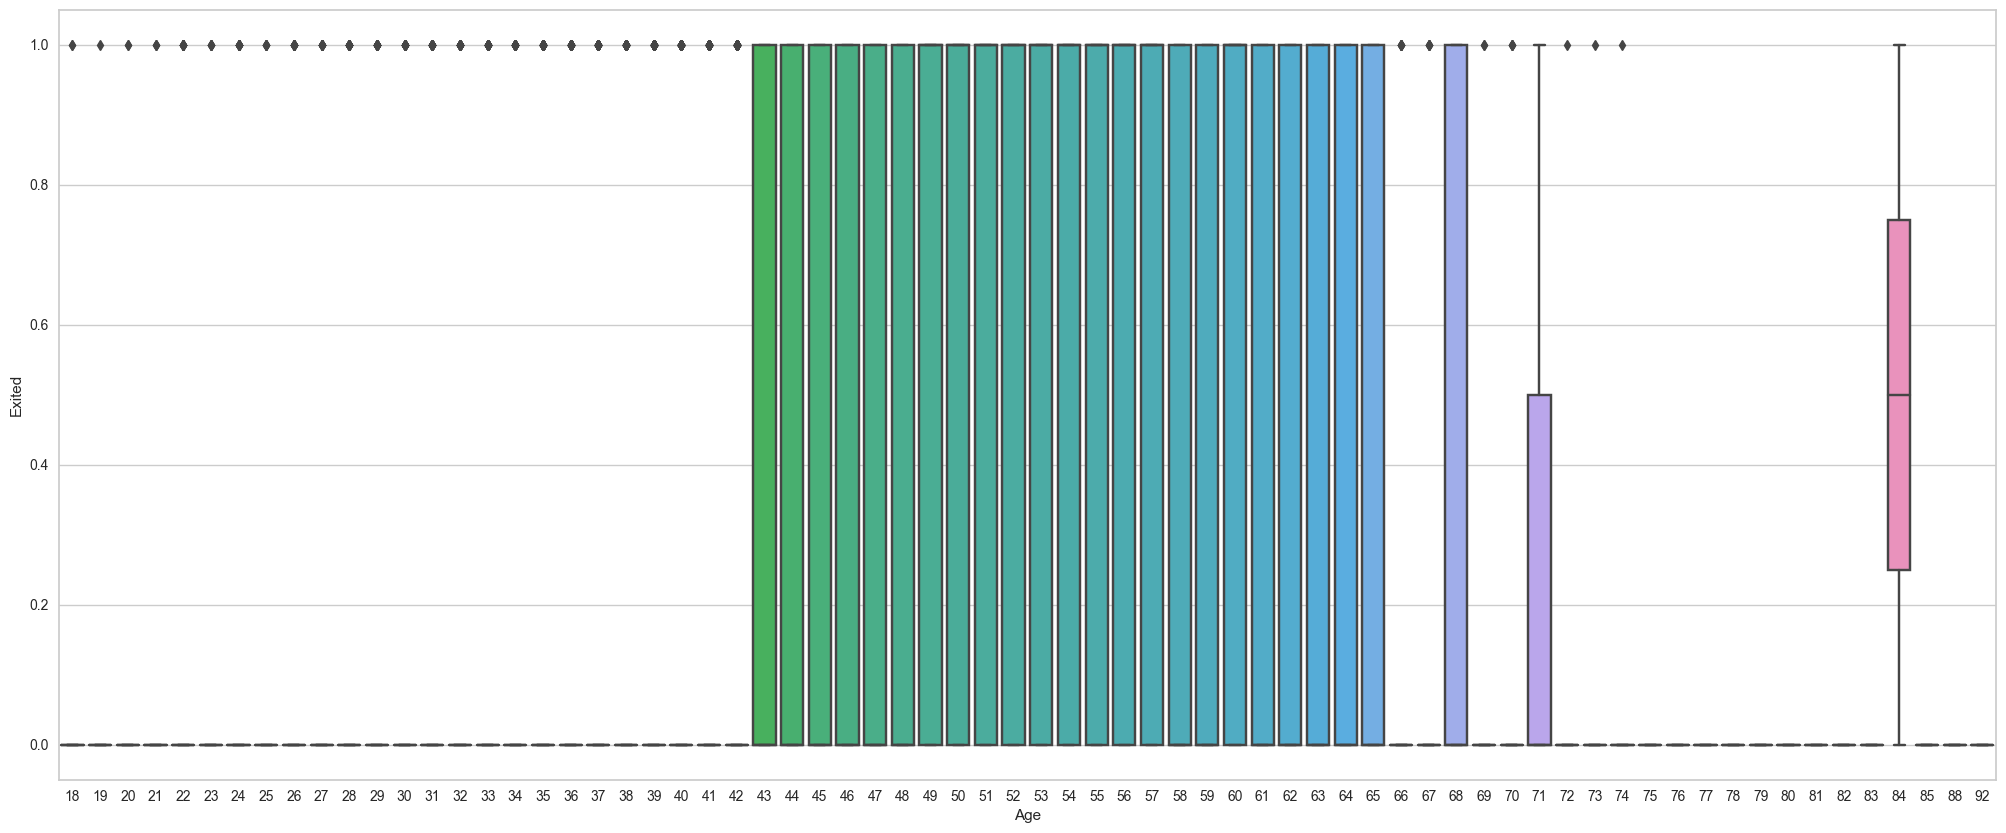

In [138]:
plt.figure(figsize=(25,10))
sns.boxplot(y='Exited',x='Age',data=data)
plt.show()

The box plot shows the distribution of ages for customers who exited (1) versus those who did not (0). It appears that customers who exited are generally older, with the median age higher than those who stayed. Younger customers have fewer exits, while older age groups, especially those in their 70s and above, have a wider age range of exits. This suggests a potential trend where older customers are more likely to exit.

# Exited Vs Tenure

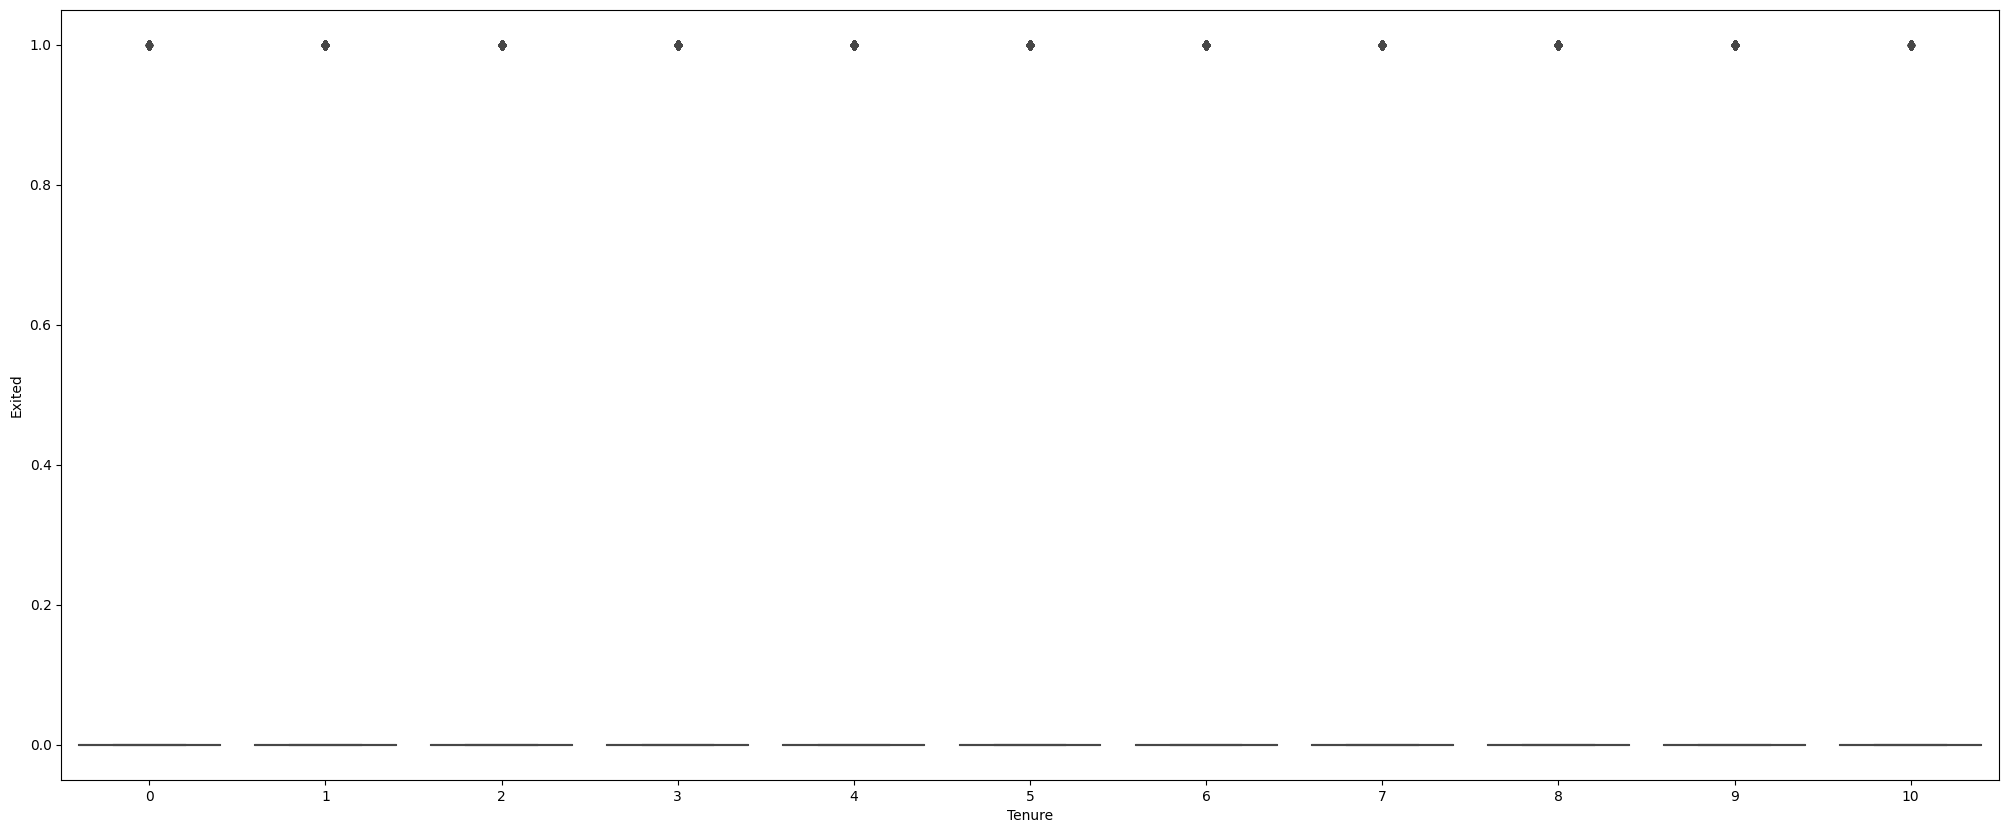

In [94]:
plt.figure(figsize=(25,10))
sns.boxplot(y='Exited',x='Tenure',data=data)
plt.show()

The box plot for tenure versus exited shows minimal variation across different tenure years. Both exited (1) and non-exited (0) customers have similar tenure distributions, suggesting that tenure does not have a strong influence on whether a customer exits or stays in this dataset.

# Exited Vs Balance

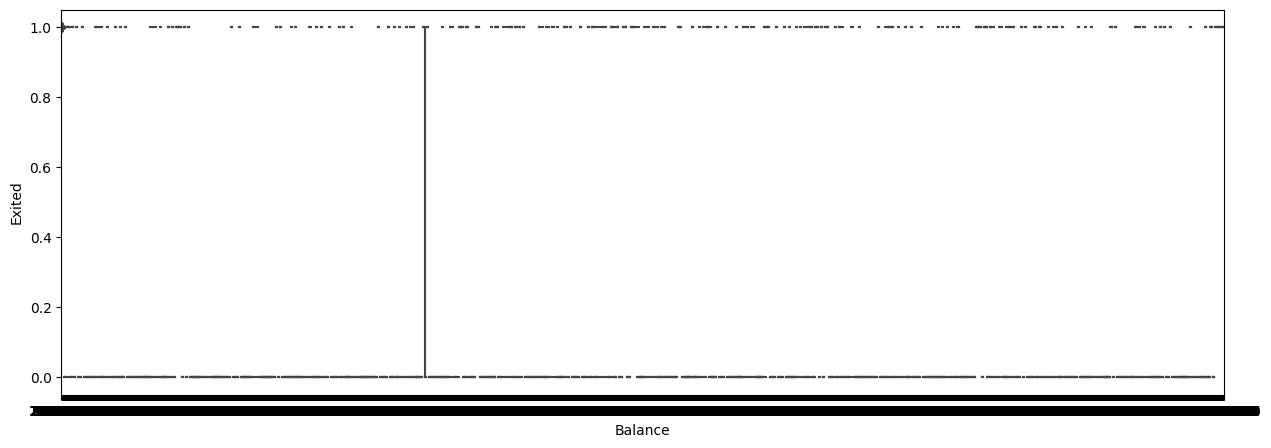

In [96]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Exited',x='Balance',data=data)
plt.show()

The box plot of balance versus exited shows that customers with a balance of zero are prevalent among both exited and non-exited categories. There is a notable concentration of zero balances, indicating that many customers maintain no balance, regardless of their exit status. Customers with non-zero balances show a slight spread, but there is no clear indication that higher balances strongly correlate with customer exits.

# Exited Vs Number of Products

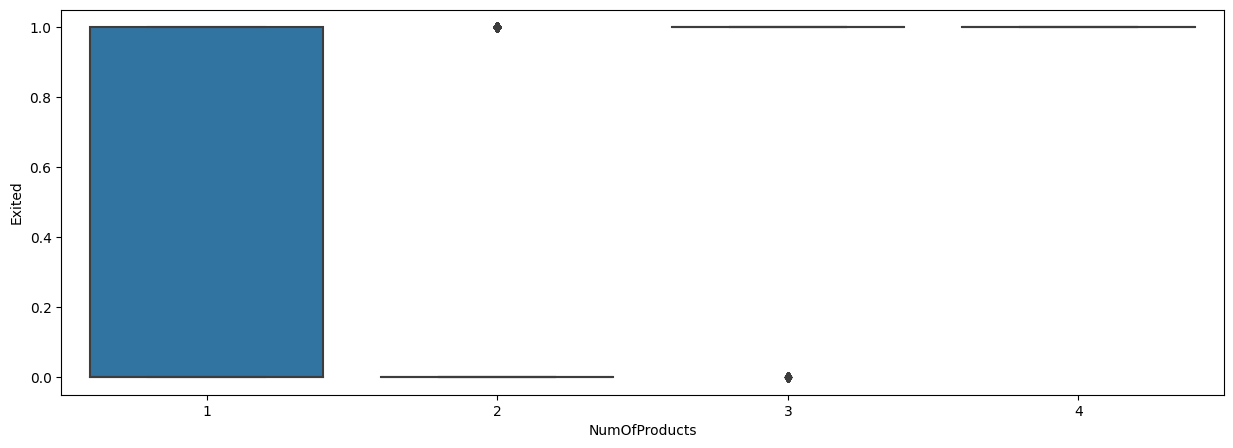

In [98]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Exited',x='NumOfProducts',data=data)
plt.show()

The box plot of NumOfProducts versus Exited shows that most customers with one product are less likely to exit, while those with more products (especially three and four) have a higher likelihood of exit, as indicated by the presence of outliers for the exited category. This suggests that customers holding more products may be at a greater risk of exiting.

# Exited Vs Estimated Salary

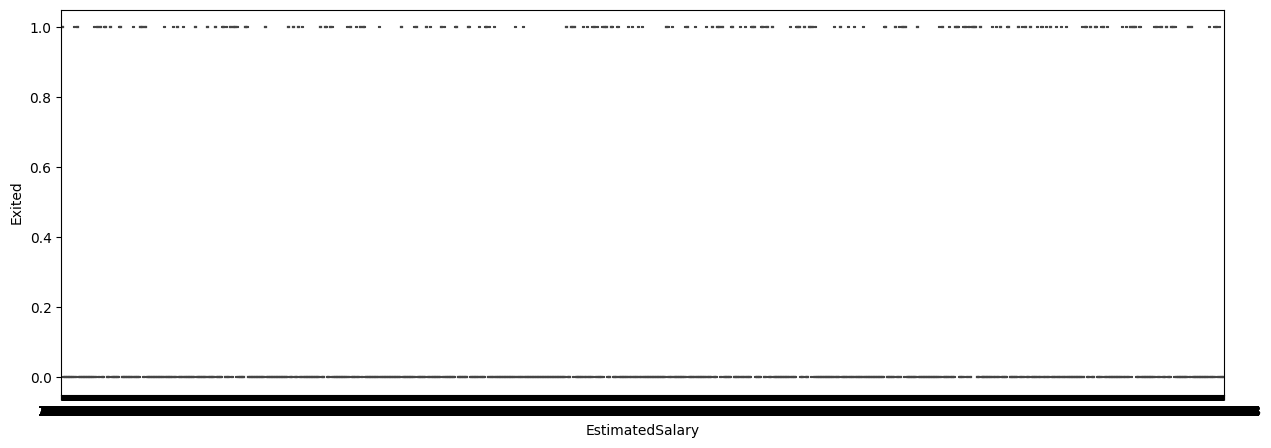

In [100]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Exited',x='EstimatedSalary',data=data)
plt.show()

The box plot of EstimatedSalary versus Exited shows that the distribution of estimated salary is similar for both exited and non-exited customers, with no significant differences. This suggests that estimated salary may not play a major role in whether a customer decides to exit or stay.

In [123]:
# Drop the 'AgeGroup' and 'Geography' columns
data = data.drop(columns=['AgeGroup', 'Geography'])

# modeling

In [125]:
# Initialize the PyCaret setup
clf = setup(data, target='Exited', session_id=123)

,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 16)"
4,Transformed data shape,"(10000, 16)"
5,Transformed train set shape,"(7000, 16)"
6,Transformed test set shape,"(3000, 16)"
7,Numeric features,14
8,Categorical features,1
9,Preprocess,True


In [126]:
# Compare different models and choose the best one
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8149,0.7313,0.3689,0.5719,0.4471,0.3424,0.3549,0.4450
et,Extra Trees Classifier,0.8143,0.7783,0.3008,0.5867,0.3969,0.3006,0.3244,0.2080
catboost,CatBoost Classifier,0.8130,0.7472,0.3836,0.5612,0.4540,0.3464,0.3563,1.6880
rf,Random Forest Classifier,0.8076,0.7519,0.3135,0.5467,0.3972,0.2933,0.3097,0.2540
lightgbm,Light Gradient Boosting Machine,0.8066,0.7022,0.3703,0.5362,0.4364,0.3249,0.3337,0.1610
ada,Ada Boost Classifier,0.8020,0.7064,0.3591,0.5213,0.4243,0.3098,0.3181,0.1330
xgboost,Extreme Gradient Boosting,0.8007,0.7085,0.3696,0.5151,0.4295,0.3130,0.3197,0.4010
lr,Logistic Regression,0.7963,0.5809,0.0000,0.0000,0.0000,0.0000,0.0000,0.9800
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0250
nb,Naive Bayes,0.7859,0.7482,0.0954,0.3978,0.1530,0.0805,0.1083,0.0340


In [127]:
# Evaluate the tuned model
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

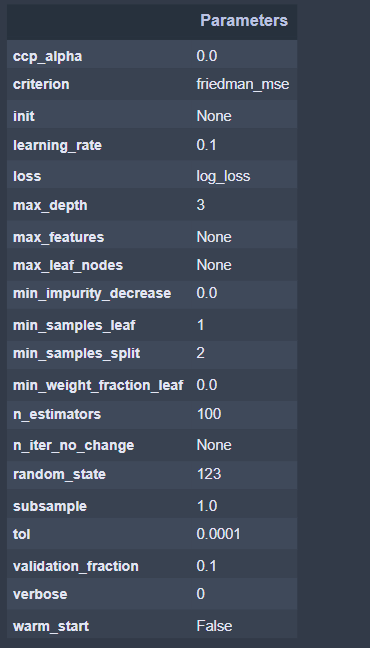

In [128]:
# Evaluate the tuned model
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

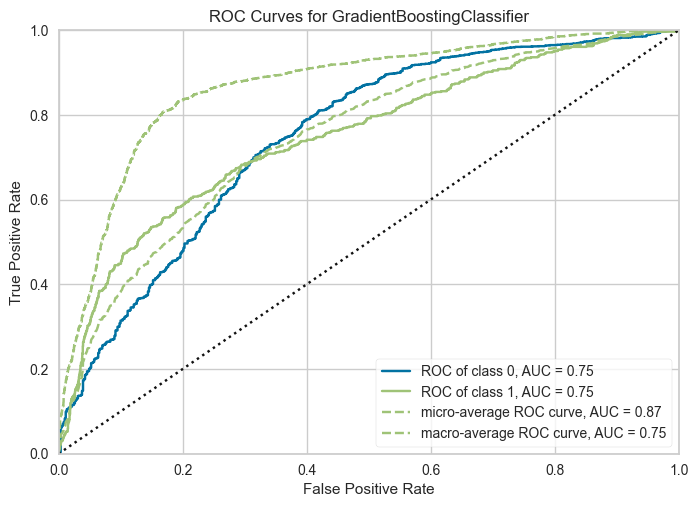

In [129]:
# Evaluate the tuned model
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

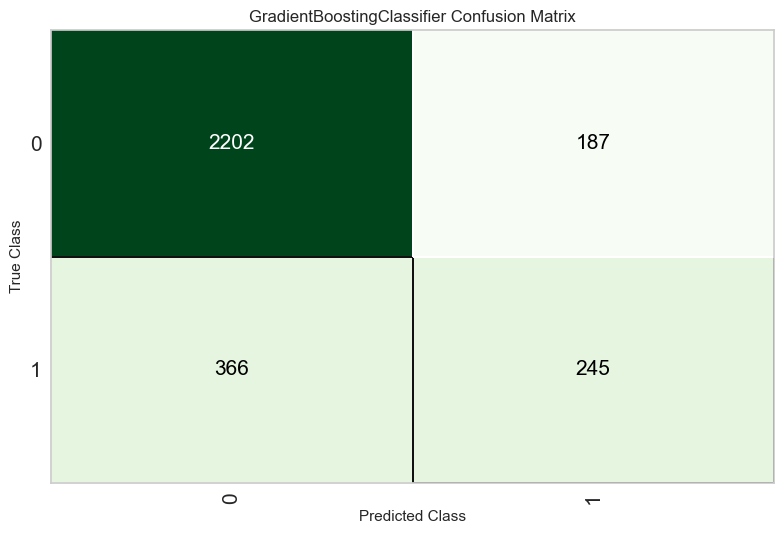

In [130]:
# Evaluate the tuned model
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

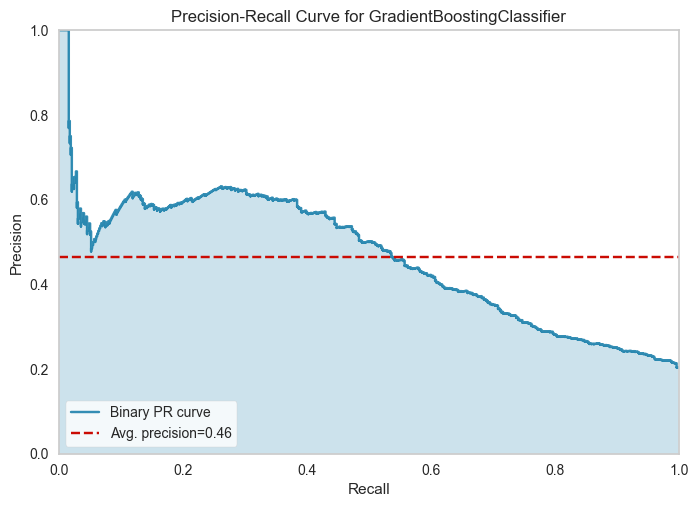

In [131]:
# Evaluate the tuned model
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

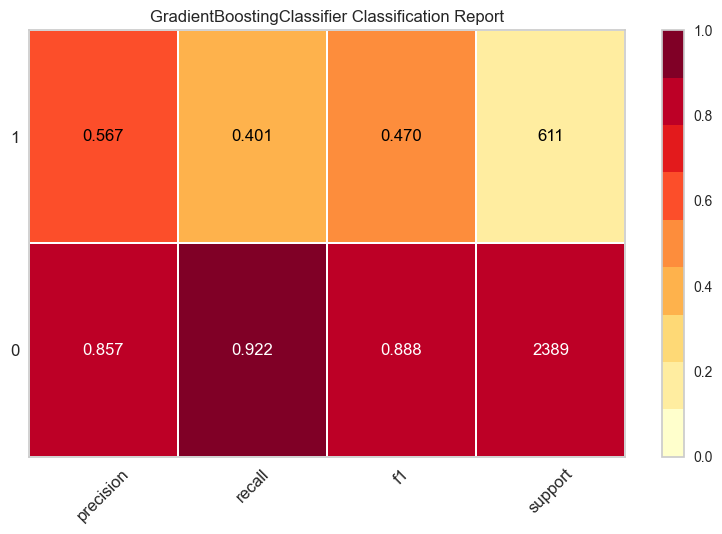

In [132]:
# Evaluate the tuned model
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

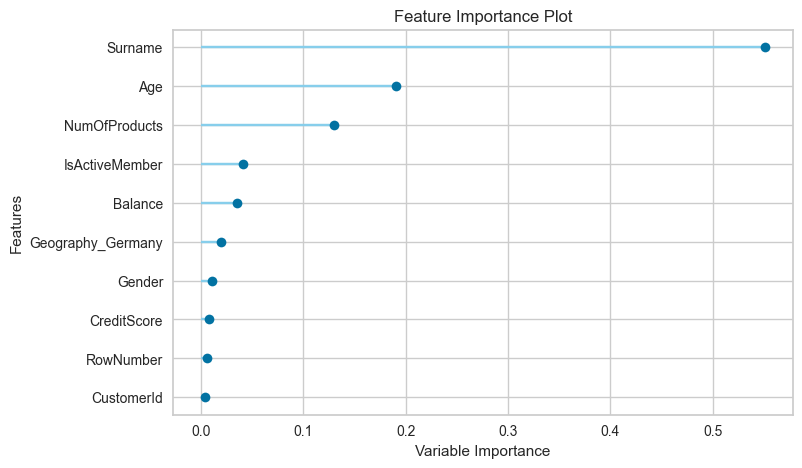

In [ ]:
# tune the best model

In [141]:
tuned_gbc = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8029,0.7632,0.2394,0.5312,0.3301,0.2335,0.2591
1,0.8157,0.7756,0.2817,0.5970,0.3828,0.2905,0.3189
2,0.7986,0.7365,0.1831,0.5098,0.2694,0.1817,0.2140
3,0.8100,0.7920,0.1901,0.6000,0.2888,0.2118,0.2589
4,0.8000,0.7817,0.2517,0.5217,0.3396,0.2383,0.2604
5,0.8057,0.7179,0.2098,0.5660,0.3061,0.2199,0.2568
6,0.8186,0.7616,0.2168,0.6739,0.3280,0.2538,0.3089
7,0.7914,0.7065,0.1469,0.4667,0.2234,0.1392,0.1706
8,0.8314,0.7439,0.2657,0.7451,0.3918,0.3186,0.3760


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# I did not got a beter results so we will keep the default values